In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud

In [2]:
# !pip install wordcloud

In [3]:
import sqlite3

In [4]:
con = sqlite3.connect(r'C:\Users\Debjyoti Debnath\Downloads\DDebnath\Data Science Projects\Zomato_resources/zomato_rawdata.sqlite')

In [5]:
df = pd.read_sql_query("select *  from users", con)

In [184]:
# file_name = 'zomato_rawdata.xlsx'

In [185]:
# df.to_excel(file_name)

# 1. Analysing most famous dishes of most famous restaurants

In [6]:
df.shape

(51717, 18)

In [7]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
df.dtypes

index                           int64
url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [9]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [10]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', None, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [11]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',','')

In [12]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', None, '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [13]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

In [14]:
df['approx_cost(for two people)'].dtype

dtype('float64')

In [15]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [16]:
df['rate'] = df['rate'].str.replace('/5','')

In [17]:
df['rate'] = df['rate'].astype(str)

In [18]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'None', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [19]:
df['rate'].replace('NEW', np.nan, inplace=True)
df['rate'].replace('None', np.nan, inplace=True)
df['rate'].replace('-', np.nan, inplace=True)

In [20]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', nan, '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [21]:
df['rate'].isnull().sum()

10052

In [22]:
df['rate']

0         4.1
1         4.1
2         3.8
3         3.7
4         3.8
         ... 
51712    3.6 
51713     NaN
51714     NaN
51715    4.3 
51716    3.4 
Name: rate, Length: 51717, dtype: object

In [23]:
df['rate'] = df['rate'].astype(float)

In [24]:
df['rest_type'].value_counts()

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [25]:
df['rest_type'].isnull().sum()

227

In [26]:
data = df.dropna(subset=['rest_type'])

In [27]:
data.shape

(51490, 18)

In [28]:
data['rest_type'].str.contains('Quick Bites')

0        False
1        False
2        False
3         True
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Name: rest_type, Length: 51490, dtype: bool

In [29]:
data[data['rest_type'].str.contains('Quick Bites')]

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
23,23,https://www.zomato.com/bangalore/my-tea-house-...,"224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...",My Tea House,Yes,No,3.6,62,080 65975430\r\n+91 7337733798,Banashankari,"Quick Bites, Cafe","Pasta, Iced Tea","Italian, Fast Food, Cafe, European",600.0,"[('Rated 4.0', ""RATED\n So, went here with fr...",[],Cafes,Banashankari
26,26,https://www.zomato.com/bangalore/coffee-tindi-...,"27th Cross Rd, Banashankari Stage II, Banashan...",Coffee Tindi,Yes,No,3.8,75,+91 9945758046,Banashankari,"Cafe, Quick Bites",None,"Cafe, South Indian",200.0,"[('Rated 5.0', 'RATED\n please provide some e...",[],Cafes,Banashankari
31,31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500.0,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari
34,34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500.0,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51641,51641,https://www.zomato.com/bangalore/andhra-spices...,"188, ITPL Main Road, Brookefields, Bangalore, ...",Andhra Spices,No,No,3.2,4,None,Brookefield,Quick Bites,None,"Andhra, Chinese, South Indian",NaN,"[('Rated 2.0', ""RATED\n Food is not upto the ...",[],Dine-out,Whitefield
51642,51642,https://www.zomato.com/bangalore/basaveshwara-...,"Nanjudeshwari complex, Oppsite Brookefield Mal...",Basaveshwara Khanavali,No,No,NaN,0,+91 9740912864\n+91 7353747430,Brookefield,Quick Bites,None,South Indian,200.0,[],[],Dine-out,Whitefield
51643,51643,https://www.zomato.com/bangalore/new-ambur-bir...,"AECS Layout, ITPL Main Road, Brookefield, Bang...",New Ambur Biryani,No,No,NaN,0,+91 9443087893,Brookefield,Quick Bites,None,"Biryani, Kebab",300.0,[],[],Dine-out,Whitefield
51644,51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,None,North Indian,400.0,[],[],Dine-out,Whitefield


In [30]:
data_qb = data[data['rest_type'].str.contains('Quick Bites')]

In [31]:
data_qb.shape

(20639, 18)

In [32]:
data_qb.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [33]:
data_qb['dish_liked'].value_counts()

Biryani                                                                                          60
Paratha                                                                                          42
Masala Dosa                                                                                      35
Burgers                                                                                          33
Coffee                                                                                           19
                                                                                                 ..
Lassi, Panneer Butter Masala, Paratha, Jeera Rice, Paneer Parantha, Veg Kolhapuri, Bhindi Fry     1
Mutton Biryani, Mutton Chops, Chicken Fry, Chicken Biryani, Paya, Mutton Fry, Chilli Chicken      1
Burgers, Bun Nippat Masala, Masala Cola, Pizza, Masala Pepsi, Masala Soda, Sandwiches             1
Burgers, Chicken Whopper, French Fries                                                            1


In [34]:
data_qb['dish_liked'].str.lower()

3                                              masala dosa
23                                         pasta, iced tea
26                                                    None
31       burgers, lassi, chicken grill, naan, momos, ch...
34       rolls, veggie wrap, chocolate fantasy, rice bo...
                               ...                        
51641                                                 None
51642                                                 None
51643                                                 None
51644                                                 None
51645                                              burgers
Name: dish_liked, Length: 20639, dtype: object

In [35]:
all_dishes = data_qb['dish_liked'].str.lower().str.cat()

In [36]:
wordcloud = WordCloud().generate(all_dishes)

(-0.5, 399.5, 199.5, -0.5)

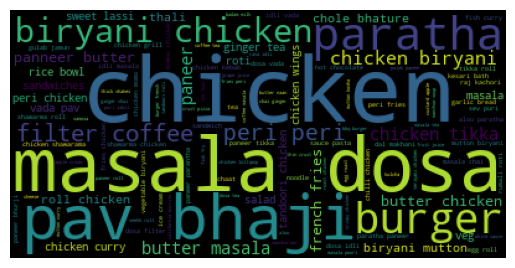

In [37]:
plt.imshow(wordcloud)
plt.axis('off')

# 2. Handling Missing Values

In [38]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [39]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [40]:
df[['rate', 'reviews_list']]

,rate,reviews_list
0,4.1,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,4.1,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,3.8,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,3.7,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,3.8,"[('Rated 4.0', 'RATED\n Very good restaurant ..."
...,...,...
51712,3.6,"[('Rated 5.0', ""RATED\n Food and service are ..."
51713,NaN,[]
51714,NaN,[]
51715,4.3,"[('Rated 4.0', 'RATED\n Nice and friendly pla..."


In [41]:
df['rate'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713     True
51714     True
51715    False
51716    False
Name: rate, Length: 51717, dtype: bool

In [42]:
df[df['rate'].isnull()]

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
72,72,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,NaN,0,+91 8050884222,Banashankari,Quick Bites,None,North Indian,150.0,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari
75,75,https://www.zomato.com/bangalore/om-sri-vinaya...,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,NaN,0,+91 8553206035,Banashankari,"Takeaway, Delivery",None,"Street Food, Fast Food",500.0,[],[],Delivery,Banashankari
84,84,https://www.zomato.com/bangalore/chill-out-ban...,"161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...",Chill Out,No,No,NaN,0,+91 9341215167,Banashankari,Quick Bites,None,"South Indian, Chinese",100.0,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery,Banashankari
90,90,https://www.zomato.com/bangalore/me-and-my-cak...,"BDA Shopping Complex, 24th Cross Road, Siddann...",Me And My Cake,No,No,NaN,0,+91 9036070410,Banashankari,Delivery,None,"Bakery, Desserts",500.0,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery,Banashankari
91,91,https://www.zomato.com/bangalore/sunsadm-banas...,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,NaN,0,+91 7829290358,Banashankari,"Takeaway, Delivery",None,South Indian,400.0,[],[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51644,51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,None,North Indian,400.0,[],[],Dine-out,Whitefield
51675,51675,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,None,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Drinks & nightlife,Whitefield
51710,51710,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,None,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Pubs and bars,Whitefield
51713,51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,None,Finger Food,600.0,[],[],Pubs and bars,Whitefield


In [43]:
df[df['rate'].isnull()].index

Int64Index([   72,    75,    84,    90,    91,    92,   107,   110,   113,
              114,
            ...
            51636, 51638, 51639, 51642, 51643, 51644, 51675, 51710, 51713,
            51714],
           dtype='int64', length=10052)

In [44]:
df['rate'][72]

nan

In [45]:
df['reviews_list'][72]

"[('Rated 4.0', 'RATED\\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served'), ('Rated 5.0', 'RATED\\n  Awesome taste, feel rich taste of food, cleanness is very good, very friendly nature by the hotel person, totally awesome, all the best gud luck')]"

In [46]:
type(df['reviews_list'][72])

str

In [47]:
#Abstract Syntax Tress
import ast

In [48]:
ast.literal_eval(df['reviews_list'][72])

[('Rated 4.0',
  'RATED\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served'),
 ('Rated 5.0',
  'RATED\n  Awesome taste, feel rich taste of food, cleanness is very good, very friendly nature by the hotel person, totally awesome, all the best gud luck')]

In [49]:
ast.literal_eval(df['reviews_list'][72])[0]

('Rated 4.0',
 'RATED\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served')

In [50]:
first_input = ast.literal_eval(df['reviews_list'][72])[0]

In [51]:
first_input

('Rated 4.0',
 'RATED\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served')

In [52]:
[i.replace('Rated', '').strip() for i in first_input]

['4.0',
 'RATED\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served']

In [53]:
[i.replace('Rated', '').strip() for i in first_input][0]

'4.0'

In [54]:
type([i.replace('Rated', '').strip() for i in first_input][0])

str

In [55]:
float([i.replace('Rated', '').strip() for i in first_input][0])

4.0

Creating a fuunction to get the rating from review list

In [56]:
def get_rate(x):
    list_of_reviews = ast.literal_eval(x)
    
    if list_of_reviews is None or len(list_of_reviews)<=1:
        return None
    else:
        first_input = list_of_reviews[0]
        rate = float([i.replace('Rated', '').strip() for i in first_input][0])
        return rate

In [57]:
df['reviews_list'].apply(get_rate)

0        4.0
1        4.0
2        3.0
3        4.0
4        4.0
        ... 
51712    5.0
51713    NaN
51714    NaN
51715    4.0
51716    5.0
Name: reviews_list, Length: 51717, dtype: float64

In [58]:
get_rate(df['reviews_list'][72])

4.0

In [59]:
df['rates_from_reviews_list'] = df['reviews_list'].apply(get_rate)

In [60]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [61]:
df['rate'][72] = df['rates_from_reviews_list'][72]

In [62]:
df['rate'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713     True
51714     True
51715    False
51716    False
Name: rate, Length: 51717, dtype: bool

In [63]:
df[df['rate'].isnull()]

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rates_from_reviews_list
75,75,https://www.zomato.com/bangalore/om-sri-vinaya...,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,NaN,0,+91 8553206035,Banashankari,"Takeaway, Delivery",None,"Street Food, Fast Food",500.0,[],[],Delivery,Banashankari,NaN
84,84,https://www.zomato.com/bangalore/chill-out-ban...,"161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...",Chill Out,No,No,NaN,0,+91 9341215167,Banashankari,Quick Bites,None,"South Indian, Chinese",100.0,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery,Banashankari,NaN
90,90,https://www.zomato.com/bangalore/me-and-my-cak...,"BDA Shopping Complex, 24th Cross Road, Siddann...",Me And My Cake,No,No,NaN,0,+91 9036070410,Banashankari,Delivery,None,"Bakery, Desserts",500.0,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery,Banashankari,1.0
91,91,https://www.zomato.com/bangalore/sunsadm-banas...,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,NaN,0,+91 7829290358,Banashankari,"Takeaway, Delivery",None,South Indian,400.0,[],[],Delivery,Banashankari,NaN
92,92,https://www.zomato.com/bangalore/annapooranesh...,"625, 5th Cross Road, Hanumanthnagar, Banashank...",Annapooraneshwari Mess,No,No,NaN,0,+91 9742009518,Banashankari,Mess,None,South Indian,200.0,[],[],Delivery,Banashankari,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51644,51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,None,North Indian,400.0,[],[],Dine-out,Whitefield,NaN
51675,51675,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,None,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Drinks & nightlife,Whitefield,NaN
51710,51710,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,None,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Pubs and bars,Whitefield,NaN
51713,51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,None,Finger Food,600.0,[],[],Pubs and bars,Whitefield,NaN


In [64]:
df[df['rate'].isnull()].index

Int64Index([   75,    84,    90,    91,    92,   107,   110,   113,   114,
              115,
            ...
            51636, 51638, 51639, 51642, 51643, 51644, 51675, 51710, 51713,
            51714],
           dtype='int64', length=10051)

In [65]:
nan_index = df[df['rate'].isnull()].index

In [66]:
nan_index

Int64Index([   75,    84,    90,    91,    92,   107,   110,   113,   114,
              115,
            ...
            51636, 51638, 51639, 51642, 51643, 51644, 51675, 51710, 51713,
            51714],
           dtype='int64', length=10051)

In [67]:
for index in nan_index:
    df['rate'][index] = df['rates_from_reviews_list'][index]

In [68]:
df['rate'].isnull().sum()

8542

In [69]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'rates_from_reviews_list'],
      dtype='object')

In [70]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            8542
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rates_from_reviews_list        16120
dtype: int64

In [71]:
dataframe = df.drop(['dish_liked','rates_from_reviews_list'], axis=1)

In [72]:
dataframe.head(5)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# 3. Feature Engineering

In [73]:
dataframe.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [74]:
dataframe['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [75]:
type(dataframe['cuisines'][0])

str

In [76]:
dataframe['cuisines'][0]

'North Indian, Mughlai, Chinese'

In [77]:
dataframe['cuisines'][0].split(',')

['North Indian', ' Mughlai', ' Chinese']

In [78]:
len(dataframe['cuisines'][0].split(','))

3

In [79]:
def count(row):
    return len(row.split(','))

In [80]:
dataframe['cuisines'].astype(str).apply(count)

0        3
1        3
2        3
3        2
4        2
        ..
51712    1
51713    1
51714    1
51715    1
51716    3
Name: cuisines, Length: 51717, dtype: int64

In [81]:
dataframe['total_cuisines'] = dataframe['cuisines'].astype(str).apply(count)
dataframe['multiple_types'] = dataframe['rest_type'].astype(str).apply(count)

In [82]:
dataframe.head(5)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),total_cuisines,multiple_types
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3,1
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3,1
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3,2
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,2,1
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,2,1


In [83]:
threshold = 3.80
dataframe['target'] = dataframe['rate'].apply(lambda x: 1 if x>=threshold else 0)

In [84]:
dataframe.head(5)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),total_cuisines,multiple_types,target
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3,1,1
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3,1,1
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3,2,1
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,2,1,0
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,2,1,1


# 4. Perform Feature Importance

In [85]:
dataframe['target']==0

0        False
1        False
2        False
3         True
4        False
         ...  
51712     True
51713     True
51714     True
51715    False
51716     True
Name: target, Length: 51717, dtype: bool

In [86]:
dataframe[dataframe['target']==0]

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),total_cuisines,multiple_types,target
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,2,1,0
6,6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800.0,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari,4,1,0
19,19,https://www.zomato.com/bangalore/360-atoms-res...,"47, 48 &49, 3Rd Floor, 21st Main Road, 2nd Sta...",360 Atoms Restaurant And Cafe,Yes,No,3.1,13,+91 9880594520,Banashankari,Cafe,"Cafe, Chinese, Continental, Italian",400.0,"[('Rated 5.0', 'RATED\n Friendly staffs , nic...",[],Cafes,Banashankari,4,1,0
20,20,https://www.zomato.com/bangalore/the-vintage-c...,"146, 50 ft Road, 3rd Phase, 3rd Stage, Near Ka...",The Vintage Cafe,Yes,No,3.0,62,+91 9880016665\r\n+91 8217311687,Banashankari,Cafe,"Cafe, French, North Indian",400.0,"[('Rated 2.0', ""RATED\n This is a tiny cafÃ\...",[],Cafes,Banashankari,3,1,0
21,21,https://www.zomato.com/bangalore/woodee-pizza-...,"3353, 2nd Cross, Opposite Auden School, Hosker...",Woodee Pizza,Yes,No,3.7,180,+91 7406822844,Banashankari,Cafe,"Cafe, Pizza, Fast Food, Beverages",500.0,"[('Rated 3.0', 'RATED\n Decided to take a bre...",[],Cafes,Banashankari,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51711,51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,080 65951222,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield,4,2,0
51712,51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,1,1,0
51713,51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,Finger Food,600.0,[],[],Pubs and bars,Whitefield,1,1,0
51714,51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,None,Whitefield,Bar,Finger Food,2000.0,[],[],Pubs and bars,Whitefield,1,1,0


In [87]:
dataframe[dataframe['target']==0]['total_cuisines']

3        2
6        4
19       4
20       3
21       4
        ..
51711    4
51712    1
51713    1
51714    1
51716    3
Name: total_cuisines, Length: 30610, dtype: int64

<AxesSubplot:xlabel='total_cuisines', ylabel='Density'>

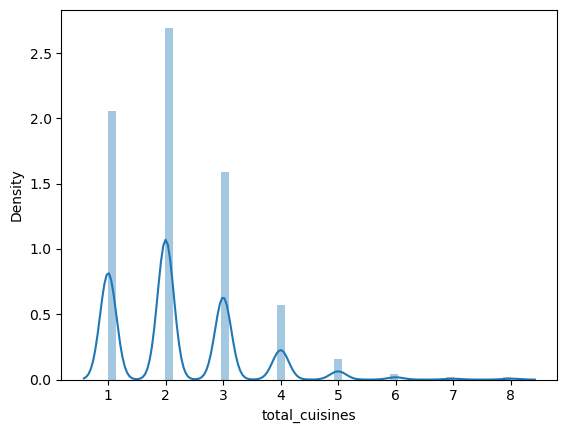

In [88]:
sns.distplot(dataframe[dataframe['target']==0]['total_cuisines'])

<AxesSubplot:xlabel='total_cuisines', ylabel='Density'>

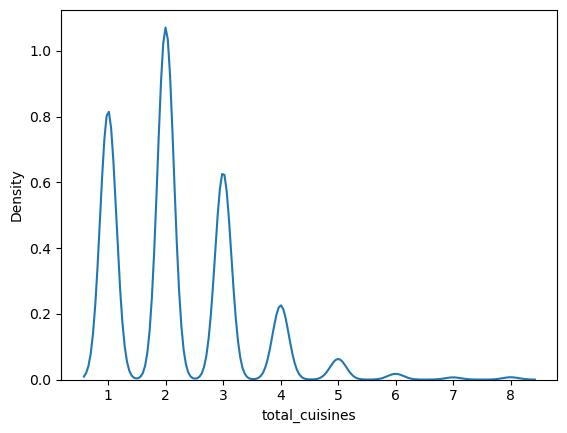

In [89]:
sns.distplot(dataframe[dataframe['target']==0]['total_cuisines'], hist=False)

<AxesSubplot:xlabel='total_cuisines', ylabel='Density'>

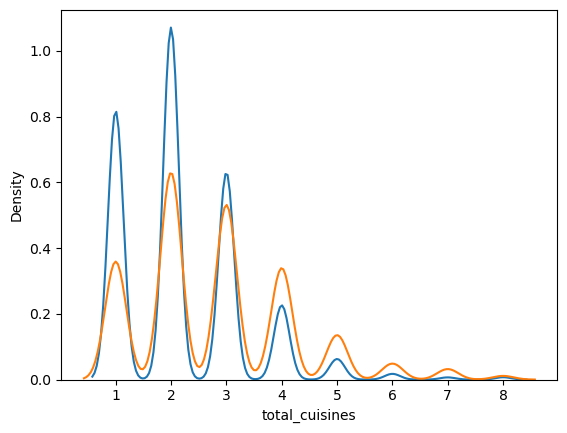

In [90]:
sns.distplot(dataframe[dataframe['target']==0]['total_cuisines'], hist=False)
sns.distplot(dataframe[dataframe['target']==1]['total_cuisines'], hist=False)

<AxesSubplot:xlabel='total_cuisines', ylabel='Density'>

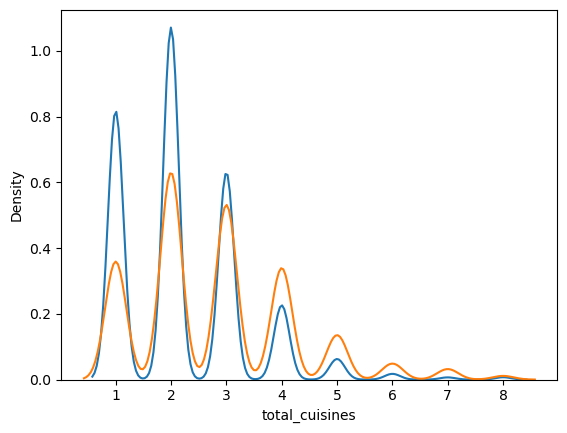

In [91]:
sns.distplot(dataframe[dataframe['target']==0]['total_cuisines'], hist=False, label='0')
sns.distplot(dataframe[dataframe['target']==1]['total_cuisines'], hist=False, label='1')

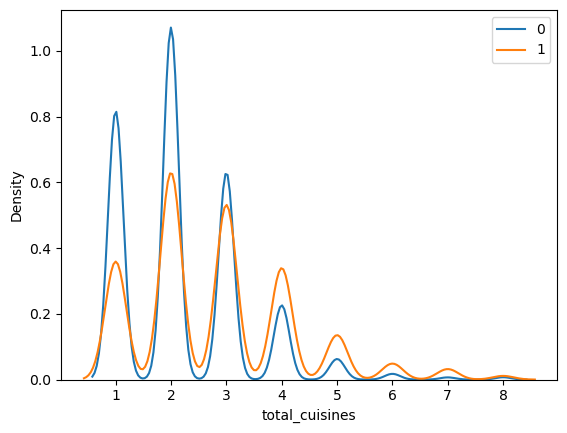

In [92]:
sns.distplot(dataframe[dataframe['target']==0]['total_cuisines'], hist=False, label='0')
sns.distplot(dataframe[dataframe['target']==1]['total_cuisines'], hist=False, label='1')
plt.legend()

In [93]:
dataframe.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'total_cuisines',
       'multiple_types', 'target'],
      dtype='object')

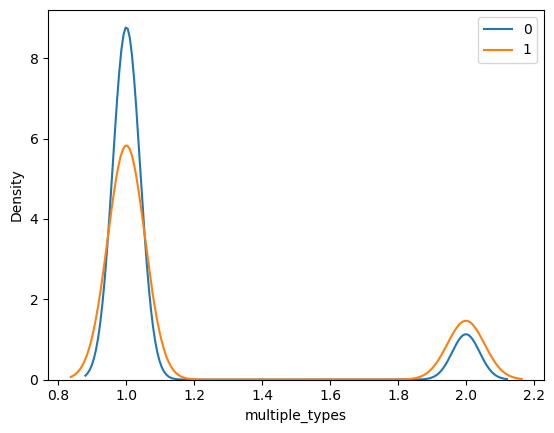

In [94]:
sns.distplot(dataframe[dataframe['target']==0]['multiple_types'], hist=False, label='0')
sns.distplot(dataframe[dataframe['target']==1]['multiple_types'], hist=False, label='1')
plt.legend()

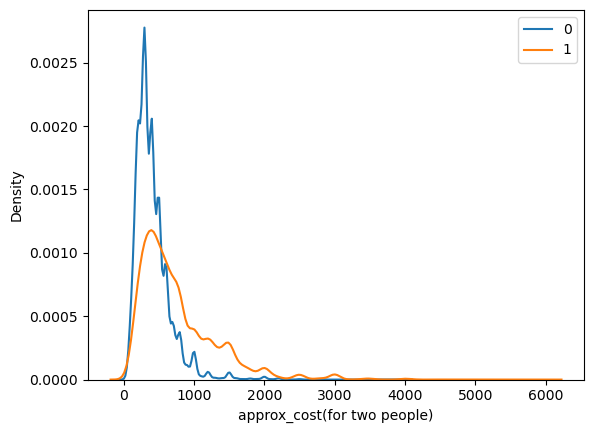

In [95]:
sns.distplot(dataframe[dataframe['target']==0]['approx_cost(for two people)'], hist=False, label='0')
sns.distplot(dataframe[dataframe['target']==1]['approx_cost(for two people)'], hist=False, label='1')
plt.legend()

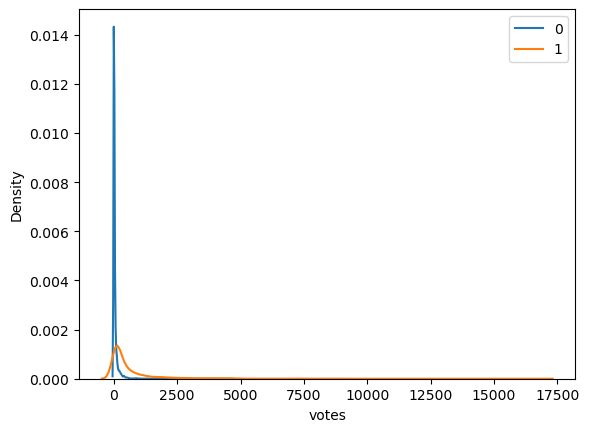

In [96]:
sns.distplot(dataframe[dataframe['target']==0]['votes'], hist=False, label='0')
sns.distplot(dataframe[dataframe['target']==1]['votes'], hist=False, label='1')
plt.legend()

Feature Encoding

In [97]:
dataframe['online_order']

0        Yes
1        Yes
2        Yes
3         No
4         No
        ... 
51712     No
51713     No
51714     No
51715     No
51716     No
Name: online_order, Length: 51717, dtype: object

In [98]:
dataframe

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),total_cuisines,multiple_types,target
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3,1,1
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3,1,1
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3,2,1
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,2,1,0
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,1,1,0
51713,51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,Finger Food,600.0,[],[],Pubs and bars,Whitefield,1,1,0
51714,51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,None,Whitefield,Bar,Finger Food,2000.0,[],[],Pubs and bars,Whitefield,1,1,0
51715,51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,1,1,1


In [99]:
dataframe = dataframe.dropna()

In [100]:
dataframe.shape

(42144, 20)

In [101]:
dataframe.info

<bound method DataFrame.info of        index                                                url  \
0          0  https://www.zomato.com/bangalore/jalsa-banasha...   
1          1  https://www.zomato.com/bangalore/spice-elephan...   
2          2  https://www.zomato.com/SanchurroBangalore?cont...   
3          3  https://www.zomato.com/bangalore/addhuri-udupi...   
4          4  https://www.zomato.com/bangalore/grand-village...   
...      ...                                                ...   
51709  51709  https://www.zomato.com/bangalore/the-farm-hous...   
51711  51711  https://www.zomato.com/bangalore/bhagini-2-whi...   
51712  51712  https://www.zomato.com/bangalore/best-brews-fo...   
51715  51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Ba

In [102]:
dataframe.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'total_cuisines',
       'multiple_types', 'target'],
      dtype='object')

In [103]:
imp_features =  ['online_order', 'book_table', 
       'votes', 'location', 'rest_type',
       'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)', 'target']

In [104]:
dataframe[imp_features]

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target
0,Yes,Yes,775,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1
1,Yes,No,787,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1
2,Yes,No,918,Banashankari,"Cafe, Casual Dining",800.0,Buffet,Banashankari,1
3,No,No,88,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0
4,No,No,166,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1
...,...,...,...,...,...,...,...,...,...
51709,No,No,34,Whitefield,"Casual Dining, Bar",800.0,Pubs and bars,Whitefield,0
51711,No,No,81,Whitefield,"Casual Dining, Bar",800.0,Pubs and bars,Whitefield,0
51712,No,No,27,Whitefield,Bar,1500.0,Pubs and bars,Whitefield,0
51715,No,Yes,236,"ITPL Main Road, Whitefield",Bar,2500.0,Pubs and bars,Whitefield,1


In [105]:
 data = dataframe[imp_features]

In [106]:
data.columns

Index(['online_order', 'book_table', 'votes', 'location', 'rest_type',
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)',
       'target'],
      dtype='object')

In [107]:
[col for col in data.columns if data[col].dtype=='O']

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [108]:
[col for col in data.columns if data[col].dtype!='O'] 

['votes', 'approx_cost(for two people)', 'target']

In [109]:
cat_features = [col for col in data.columns if data[col].dtype=='O']
num_features = [col for col in data.columns if data[col].dtype!='O']

In [110]:
data['online_order'].nunique()

2

In [111]:
for feature in cat_features:
    print('{} has total {} unique features'.format(feature, data[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 92 unique features
rest_type has total 87 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features


In [112]:
for feature in num_features:
    print('{} has total {} unique features'.format(feature, data[feature].nunique()))

votes has total 2306 unique features
approx_cost(for two people) has total 63 unique features
target has total 2 unique features


In [113]:
data['rest_type'].value_counts()

Quick Bites                   14269
Casual Dining                  9759
Cafe                           3365
Dessert Parlor                 1887
Delivery                       1710
                              ...  
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Bakery, Beverage Shop             1
Quick Bites, Kiosk                1
Bakery, Food Court                1
Name: rest_type, Length: 87, dtype: int64

In [114]:
data['rest_type'].value_counts()[0:10]/len(data)*100

Quick Bites           33.857726
Casual Dining         23.156321
Cafe                   7.984529
Dessert Parlor         4.477506
Delivery               4.057517
Takeaway, Delivery     3.177202
Casual Dining, Bar     2.598235
Bakery                 1.793850
Beverage Shop          1.596906
Bar                    1.516230
Name: rest_type, dtype: float64

In [115]:
freq_cat = data['rest_type'].value_counts()[0:5]/len(data)*100

In [116]:
freq_cat.index

Index(['Quick Bites', 'Casual Dining', 'Cafe', 'Dessert Parlor', 'Delivery'], dtype='object')

In [117]:
data['rest_type'].isin(freq_cat.index)

0         True
1         True
2        False
3         True
4         True
         ...  
51709    False
51711    False
51712    False
51715    False
51716    False
Name: rest_type, Length: 42144, dtype: bool

In [118]:
data[data['rest_type'].isin(freq_cat.index)]

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target
0,Yes,Yes,775,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1
1,Yes,No,787,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1
3,No,No,88,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0
4,No,No,166,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1
5,Yes,No,286,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1
...,...,...,...,...,...,...,...,...,...
51632,No,No,4,KR Puram,Quick Bites,350.0,Dine-out,Whitefield,0
51634,No,No,34,Brookefield,Quick Bites,200.0,Dine-out,Whitefield,0
51635,No,No,7,KR Puram,Quick Bites,400.0,Dine-out,Whitefield,0
51640,No,No,31,KR Puram,Quick Bites,400.0,Dine-out,Whitefield,0


In [119]:
data['rest_type'].apply(lambda x: 'other' if x not in freq_cat.index else x)

0        Casual Dining
1        Casual Dining
2                other
3          Quick Bites
4        Casual Dining
             ...      
51709            other
51711            other
51712            other
51715            other
51716            other
Name: rest_type, Length: 42144, dtype: object

In [120]:
data['rest_type'] = data['rest_type'].apply(lambda x: 'other' if x not in freq_cat.index else x)

In [121]:
data['rest_type'].value_counts()

Quick Bites       14269
other             11154
Casual Dining      9759
Cafe               3365
Dessert Parlor     1887
Delivery           1710
Name: rest_type, dtype: int64

In [122]:
data['listed_in(city)'].value_counts()/len(data)*100

BTM                      6.304575
Koramangala 7th Block    5.682897
Koramangala 5th Block    5.464598
Koramangala 4th Block    5.455106
Koramangala 6th Block    5.108675
Jayanagar                4.683941
JP Nagar                 4.002942
Indiranagar              3.734814
Church Street            3.673121
MG Road                  3.644647
Brigade Road             3.571090
Lavelle Road             3.485668
HSR                      3.246014
Residency Road           3.219913
Marathahalli             3.113136
Bannerghatta Road        2.987377
Whitefield               2.920938
Old Airport Road         2.821279
Brookefield              2.783314
Basavanagudi             2.565015
Kammanahalli             2.484339
Sarjapur Road            2.446374
Kalyan Nagar             2.432137
Bellandur                2.337225
Frazer Town              2.318242
Malleshwaram             2.242312
Electronic City          2.080961
Rajajinagar              2.078588
Banashankari             1.744021
New BEL Road  

In [123]:
data['listed_in(type)'].value_counts()/len(data)*100

Delivery              49.867122
Dine-out              33.966875
Desserts               6.529992
Cafes                  3.590072
Drinks & nightlife     2.500949
Buffet                 2.033504
Pubs and bars          1.511484
Name: listed_in(type), dtype: float64

In [124]:
cat_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [125]:
pd.get_dummies(data['online_order'], prefix='online_order', drop_first=True)

,online_order_Yes
0,1
1,1
2,1
3,0
4,0
...,...
51709,0
51711,0
51712,0
51715,0


In [126]:
for col in ['online_order','book_table','rest_type','listed_in(type)']:
    col_encoded = pd.get_dummies(data[col], prefix=col, drop_first=True)
    data = pd.concat([data, col_encoded], axis=1)

In [127]:
data.head(10)

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,online_order_Yes,...,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,Yes,Yes,775,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Yes,No,787,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Yes,No,918,Banashankari,other,800.0,Buffet,Banashankari,1,1,...,0,0,0,1,0,0,0,0,0,0
3,No,No,88,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0,0,...,0,0,1,0,0,0,0,0,0,0
4,No,No,166,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1,0,...,0,0,0,0,0,0,0,0,0,0
5,Yes,No,286,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1,1,...,0,0,0,0,0,0,0,0,0,0
6,No,No,8,Mysore Road,Casual Dining,800.0,Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Yes,Yes,2556,Banashankari,other,600.0,Cafes,Banashankari,1,1,...,0,0,0,1,1,0,0,0,0,0
8,Yes,No,324,Banashankari,Cafe,700.0,Cafes,Banashankari,1,1,...,0,0,0,0,1,0,0,0,0,0
9,Yes,No,504,Banashankari,Cafe,550.0,Cafes,Banashankari,1,1,...,0,0,0,0,1,0,0,0,0,0


In [128]:
data[['location', 'listed_in(city)']]

,location,listed_in(city)
0,Banashankari,Banashankari
1,Banashankari,Banashankari
2,Banashankari,Banashankari
3,Banashankari,Banashankari
4,Basavanagudi,Banashankari
...,...,...
51709,Whitefield,Whitefield
51711,Whitefield,Whitefield
51712,Whitefield,Whitefield
51715,"ITPL Main Road, Whitefield",Whitefield


In [129]:
data.groupby(['location'])['target'].mean()

location
BTM                  0.329703
Banashankari         0.477124
Banaswadi            0.259494
Bannerghatta Road    0.305071
Basavanagudi         0.523333
                       ...   
West Bangalore       0.250000
Whitefield           0.404599
Wilson Garden        0.286458
Yelahanka            0.500000
Yeshwantpur          0.223214
Name: target, Length: 92, dtype: float64

In [130]:
data.groupby(['location'])['target'].mean().to_dict()

{'BTM': 0.3297029702970297,
 'Banashankari': 0.477124183006536,
 'Banaswadi': 0.25949367088607594,
 'Bannerghatta Road': 0.3050713153724247,
 'Basavanagudi': 0.5233333333333333,
 'Basaveshwara Nagar': 0.43283582089552236,
 'Bellandur': 0.32976653696498054,
 'Bommanahalli': 0.07534246575342465,
 'Brigade Road': 0.5205855443732845,
 'Brookefield': 0.4028776978417266,
 'CV Raman Nagar': 0.12903225806451613,
 'Central Bangalore': 0.0,
 'Church Street': 0.8099630996309963,
 'City Market': 0.2727272727272727,
 'Commercial Street': 0.4290322580645161,
 'Cunningham Road': 0.6948051948051948,
 'Domlur': 0.3581730769230769,
 'East Bangalore': 0.16666666666666666,
 'Ejipura': 0.13409961685823754,
 'Electronic City': 0.2615039281705948,
 'Frazer Town': 0.4098939929328622,
 'HBR Layout': 0.5825242718446602,
 'HSR': 0.4899853444064485,
 'Hebbal': 0.5,
 'Hennur': 0.1896551724137931,
 'Hosur Road': 0.5138888888888888,
 'ITPL Main Road, Whitefield': 0.32967032967032966,
 'Indiranagar': 0.66319253976961

In [131]:
dict_mean_location = data.groupby(['location'])['target'].mean().to_dict()

In [132]:
data['location'].map(dict_mean_location)

0        0.477124
1        0.477124
2        0.477124
3        0.477124
4        0.523333
           ...   
51709    0.404599
51711    0.404599
51712    0.404599
51715    0.329670
51716    0.329670
Name: location, Length: 42144, dtype: float64

In [133]:
data['location'] = data['location'].map(dict_mean_location)

In [134]:
data['location']

0        0.477124
1        0.477124
2        0.477124
3        0.477124
4        0.523333
           ...   
51709    0.404599
51711    0.404599
51712    0.404599
51715    0.329670
51716    0.329670
Name: location, Length: 42144, dtype: float64

In [135]:
dict_mean_city = data.groupby(['listed_in(city)'])['target'].mean().to_dict()

In [136]:
data['listed_in(city)'] = data['listed_in(city)'].map(dict_mean_city)

In [137]:
data['listed_in(city)']

0        0.482993
1        0.482993
2        0.482993
3        0.482993
4        0.482993
           ...   
51709    0.406986
51711    0.406986
51712    0.406986
51715    0.406986
51716    0.406986
Name: listed_in(city), Length: 42144, dtype: float64

In [138]:
data.head(10)

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,online_order_Yes,...,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,Yes,Yes,775,0.477124,Casual Dining,800.0,Buffet,0.482993,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Yes,No,787,0.477124,Casual Dining,800.0,Buffet,0.482993,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Yes,No,918,0.477124,other,800.0,Buffet,0.482993,1,1,...,0,0,0,1,0,0,0,0,0,0
3,No,No,88,0.477124,Quick Bites,300.0,Buffet,0.482993,0,0,...,0,0,1,0,0,0,0,0,0,0
4,No,No,166,0.523333,Casual Dining,600.0,Buffet,0.482993,1,0,...,0,0,0,0,0,0,0,0,0,0
5,Yes,No,286,0.523333,Casual Dining,600.0,Buffet,0.482993,1,1,...,0,0,0,0,0,0,0,0,0,0
6,No,No,8,0.200000,Casual Dining,800.0,Buffet,0.482993,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Yes,Yes,2556,0.477124,other,600.0,Cafes,0.482993,1,1,...,0,0,0,1,1,0,0,0,0,0
8,Yes,No,324,0.477124,Cafe,700.0,Cafes,0.482993,1,1,...,0,0,0,0,1,0,0,0,0,0
9,Yes,No,504,0.477124,Cafe,550.0,Cafes,0.482993,1,1,...,0,0,0,0,1,0,0,0,0,0


In [139]:
data.columns

Index(['online_order', 'book_table', 'votes', 'location', 'rest_type',
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)',
       'target', 'online_order_Yes', 'book_table_Yes',
       'rest_type_Casual Dining', 'rest_type_Delivery',
       'rest_type_Dessert Parlor', 'rest_type_Quick Bites', 'rest_type_other',
       'listed_in(type)_Cafes', 'listed_in(type)_Delivery',
       'listed_in(type)_Desserts', 'listed_in(type)_Dine-out',
       'listed_in(type)_Drinks & nightlife', 'listed_in(type)_Pubs and bars'],
      dtype='object')

In [140]:
data.drop(['online_order', 'book_table', 'rest_type', 'listed_in(type)'], axis=1, inplace=True)

In [141]:
data.head(10)

,votes,location,approx_cost(for two people),listed_in(city),target,online_order_Yes,book_table_Yes,rest_type_Casual Dining,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,775,0.477124,800.0,0.482993,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,787,0.477124,800.0,0.482993,1,1,0,1,0,0,0,0,0,0,0,0,0,0
2,918,0.477124,800.0,0.482993,1,1,0,0,0,0,0,1,0,0,0,0,0,0
3,88,0.477124,300.0,0.482993,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,166,0.523333,600.0,0.482993,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,286,0.523333,600.0,0.482993,1,1,0,1,0,0,0,0,0,0,0,0,0,0
6,8,0.200000,800.0,0.482993,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,2556,0.477124,600.0,0.482993,1,1,1,0,0,0,0,1,1,0,0,0,0,0
8,324,0.477124,700.0,0.482993,1,1,0,0,0,0,0,0,1,0,0,0,0,0
9,504,0.477124,550.0,0.482993,1,1,0,0,0,0,0,0,1,0,0,0,0,0


Handling Outliers

In [142]:
data['votes'].min()
data['votes'].max()

16832

In [143]:
from scipy import stats

<function matplotlib.pyplot.show(close=None, block=None)>

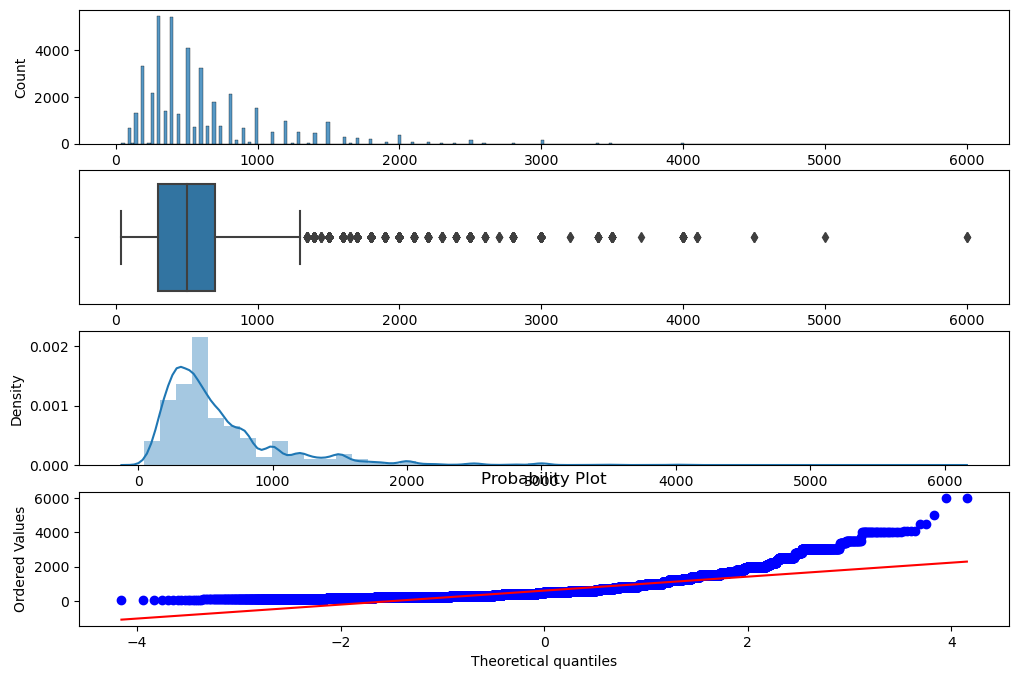

In [144]:
plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['approx_cost(for two people)'])

plt.subplot(412)
sns.boxplot(data['approx_cost(for two people)'])

plt.subplot(413)
sns.distplot(data['approx_cost(for two people)'])

plt.subplot(414)
stats.probplot(data['approx_cost(for two people)'], plot=plt)

plt.show

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='Density'>

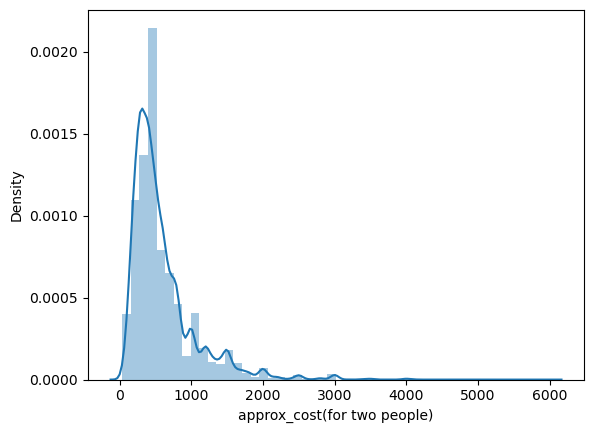

In [145]:
sns.distplot(data['approx_cost(for two people)'])

In [146]:
np.log1p(data['approx_cost(for two people)'])

0        6.685861
1        6.685861
2        6.685861
3        5.707110
4        6.398595
           ...   
51709    6.685861
51711    6.685861
51712    7.313887
51715    7.824446
51716    7.313887
Name: approx_cost(for two people), Length: 42144, dtype: float64

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='Density'>

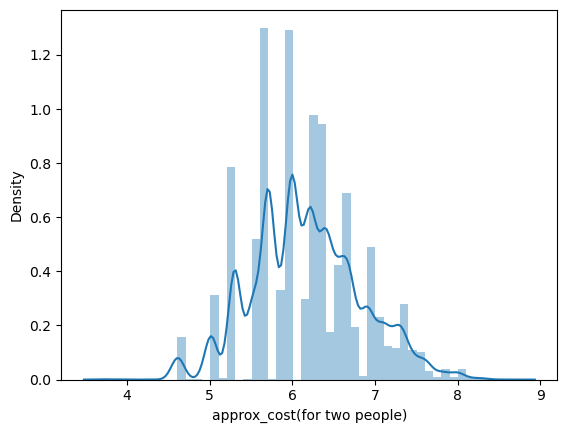

In [147]:
sns.distplot(np.log1p(data['approx_cost(for two people)']))

In [148]:
data['approx_cost(for two people)'] = np.log1p(data['approx_cost(for two people)'])

<function matplotlib.pyplot.show(close=None, block=None)>

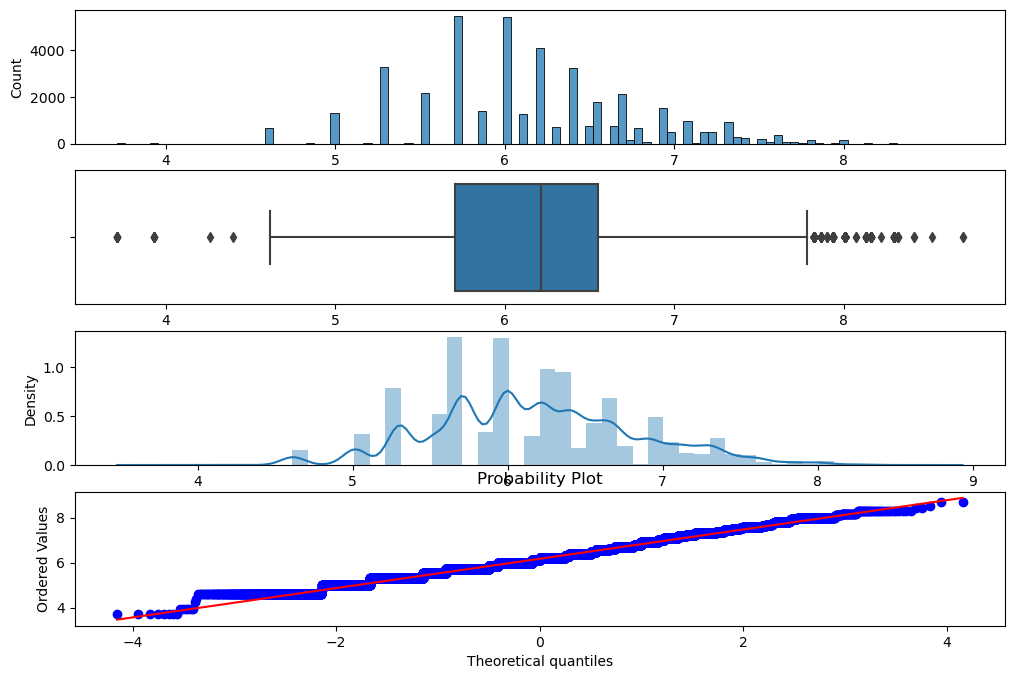

In [149]:
plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['approx_cost(for two people)'])

plt.subplot(412)
sns.boxplot(data['approx_cost(for two people)'])

plt.subplot(413)
sns.distplot(data['approx_cost(for two people)'])

plt.subplot(414)
stats.probplot(data['approx_cost(for two people)'], plot=plt)

plt.show

In [150]:
data.columns

Index(['votes', 'location', 'approx_cost(for two people)', 'listed_in(city)',
       'target', 'online_order_Yes', 'book_table_Yes',
       'rest_type_Casual Dining', 'rest_type_Delivery',
       'rest_type_Dessert Parlor', 'rest_type_Quick Bites', 'rest_type_other',
       'listed_in(type)_Cafes', 'listed_in(type)_Delivery',
       'listed_in(type)_Desserts', 'listed_in(type)_Dine-out',
       'listed_in(type)_Drinks & nightlife', 'listed_in(type)_Pubs and bars'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

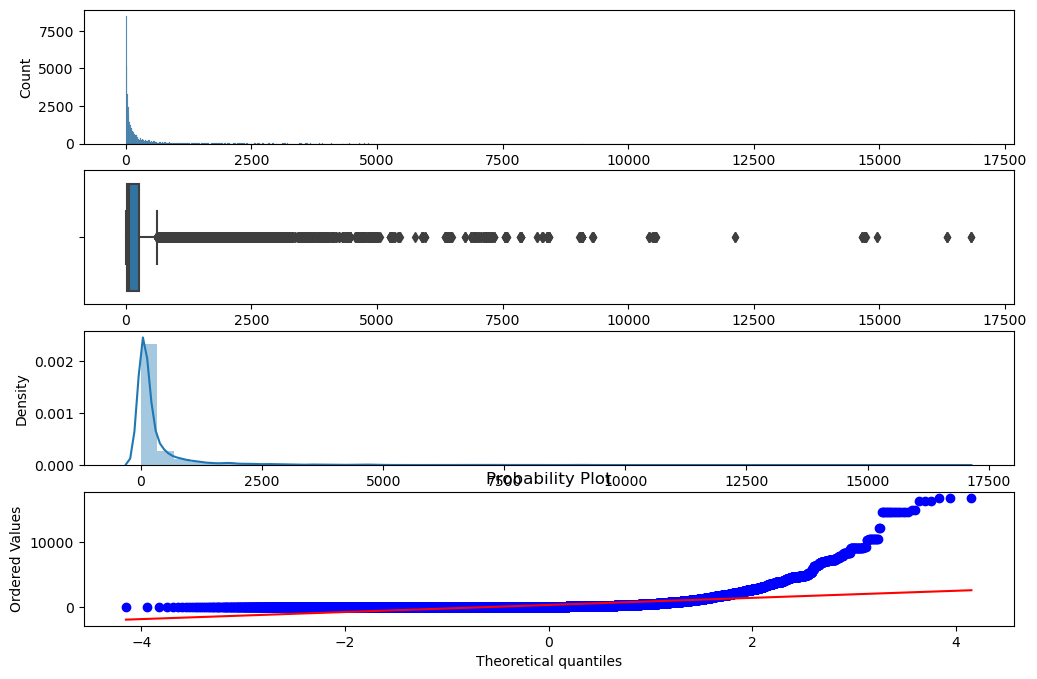

In [151]:
plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['votes'])

plt.subplot(412)
sns.boxplot(data['votes'])

plt.subplot(413)
sns.distplot(data['votes'])

plt.subplot(414)
stats.probplot(data['votes'], plot=plt)

plt.show

In [152]:
data['votes'] = np.log1p(data['votes'])

<function matplotlib.pyplot.show(close=None, block=None)>

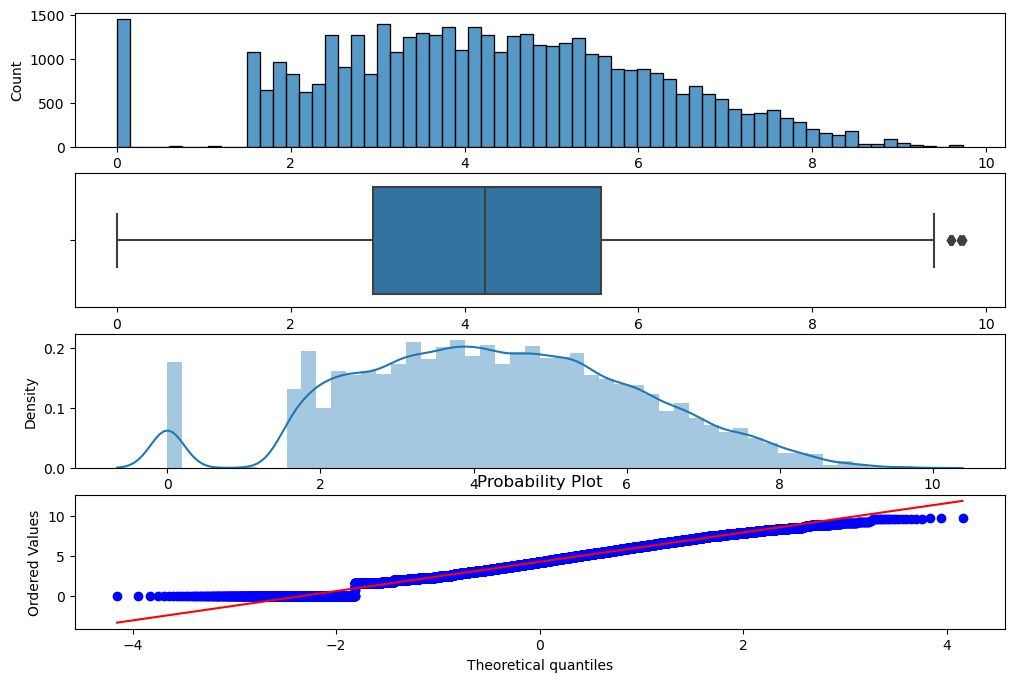

In [153]:
plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['votes'])

plt.subplot(412)
sns.boxplot(data['votes'])

plt.subplot(413)
sns.distplot(data['votes'])

plt.subplot(414)
stats.probplot(data['votes'], plot=plt)

plt.show

# 5. Building the model

In [154]:
X = data.drop('target', axis=1)

In [155]:
y = data['target']

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [158]:
X_train.shape

(31608, 17)

In [159]:
data.shape

(42144, 18)

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
rf_model = RandomForestClassifier()

In [162]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [163]:
predictions = rf_model.predict(X_test)

In [164]:
predictions

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [165]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [166]:
accuracy_score(predictions , y_test)

0.9132498101746394

In [167]:
confusion_matrix(predictions , y_test)

array([[4966,  473],
       [ 441, 4656]], dtype=int64)

# 6. Hyperparameter Tuning

In [168]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(100 , 1200 , num=3)] 

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5 ,30 , num=3)]

# Minimum number of samples required to split a node
min_samples_split= [5 , 10 , 100]

In [169]:
# Create the random grid or hyper-parameter space
random_grid = {
    'n_estimators':n_estimators , 
    'max_features' : max_features , 
    'max_depth' : max_depth , 
    'min_samples_split' : min_samples_split
}

In [170]:
random_grid

{'n_estimators': [100, 650, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 17, 30],
 'min_samples_split': [5, 10, 100]}

In [171]:
3*2*3*3*2

108

In [172]:
from sklearn.model_selection import RandomizedSearchCV

In [173]:
estimator = RandomForestClassifier()

In [174]:
rf_random = RandomizedSearchCV(estimator = estimator , param_distributions= random_grid , cv=2 , verbose=2 , n_jobs=-1)

In [175]:
rf_random.fit(X_train , y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 17, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 100],
                                        'n_estimators': [100, 650, 1200]},
                   verbose=2)

In [176]:
rf_random.best_params_ ## getting best values of parameters

{'n_estimators': 1200,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 30}

In [177]:
rf_random.best_estimator_ ## getting best model(ie optimised model)

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=5,
                       n_estimators=1200)

In [179]:
rf_opt = RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=5,
                       n_estimators=1250)

In [180]:
rf_opt.fit(X_train , y_train)

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=5,
                       n_estimators=1250)

In [181]:
predictions_opt = rf_opt.predict(X_test)

In [182]:
predictions_opt

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [183]:
accuracy_score(predictions_opt , y_test)

0.9106871678056189